In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.textpath
import matplotlib.patches
from matplotlib.font_manager import FontProperties
import numpy as np


In [2]:

def main():
    fig = plt.figure(figsize=[12, 6])
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    ax.coastlines()
    ax.gridlines()

    # generate a matplotlib path representing the word "cartopy"
    fp = FontProperties(family='Bitstream Vera Sans', weight='bold')
    logo_path = matplotlib.textpath.TextPath((-175, -35), 'cartopy',
                                             size=1, prop=fp)
    # scale the letters up to sensible longitude and latitude sizes
    logo_path._vertices *= np.array([80, 160])

    # add a background image
    im = ax.stock_img()
    # clip the image according to the logo_path. mpl v1.2.0 does not support
    # the transform API that cartopy makes use of, so we have to convert the
    # projection into a transform manually
    plate_carree_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    im.set_clip_path(logo_path, transform=plate_carree_transform)

    # add the path as a patch, drawing black outlines around the text
    patch = matplotlib.patches.PathPatch(logo_path,
                                         facecolor='none', edgecolor='black',
                                         transform=ccrs.PlateCarree())
    ax.add_patch(patch)

    plt.show()


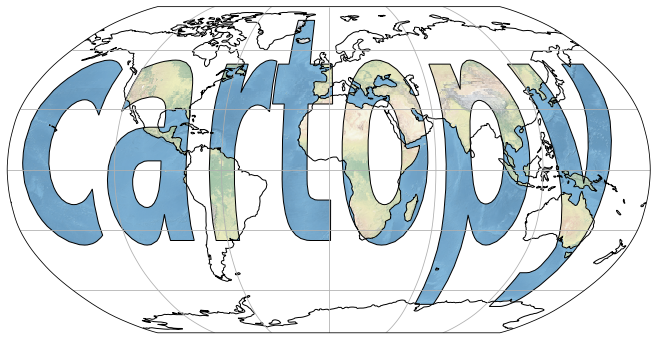

In [3]:
main()